# Stochastic Model: Results of different #agent values

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results[results.num_robots == 5]
results = results.groupby(['planner','num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticAdditive5LackPlanner,100,5.0,2.0,1.0,0.5,203.777320,46.914291,21496.047925,35.063000
1,StochasticAdditive5LackPlanner,200,5.0,2.0,1.0,0.5,203.499370,285.733978,45161.603796,50.328667
2,StochasticAdditive5LackPlanner,300,5.0,2.0,1.0,0.5,201.471077,910.263876,68453.049619,66.352333
3,StochasticAdditive5LackPlanner,400,5.0,2.0,1.0,0.5,205.322433,2179.332733,92461.361890,75.795000
4,StochasticAdditive5LackPlanner,500,5.0,2.0,1.0,0.5,204.194052,4298.534937,116143.441890,87.580667


In [5]:
planners_names = ['StochasticStaticLackPlanner', 'StochasticAdditive5LackPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:green','navajowhite','burlywood','tab:orange']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

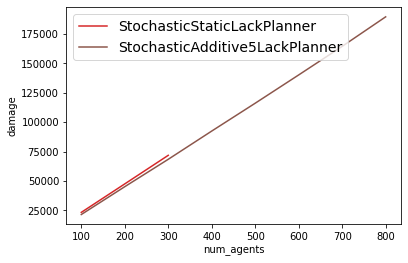

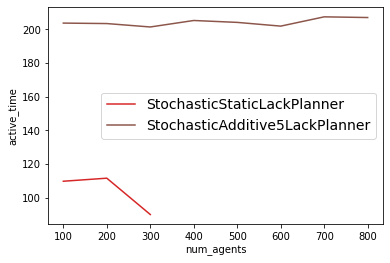

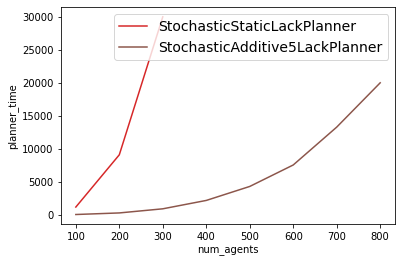

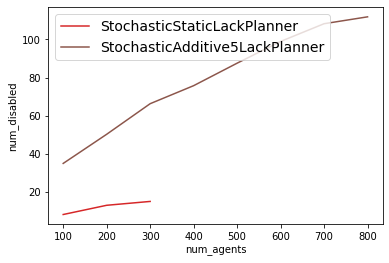

In [6]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    # if i == 1:
    plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()